**Importing dependencies and libraries **

Aim: To predict the price of the car, using various features provided in the dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**EDA**



In [23]:
df = pd.read_csv('/Users/jamilahalharbi/Desktop/jeje/UsedCarsSA_Unclean_EN.csv') # loading the data from csv file to pandas dataframe

In [24]:
df.head() # inspecting the first 5 rows of the dataframe

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [25]:
df.shape # checking the number of rows and columns

(8248, 15)

In [26]:
#define values
values = ["Negotiable"]

#drop rows that contain any value in the list
df = df[df.Price.isin(values) == False]


In [27]:
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
5,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,Used,39000,Riyadh,72000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,https://syarah.com/%D9%83%D9%8A%D8%A7_%D8%B3%D...,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,Used,257000,Dammam,15000,False
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [28]:
df["Price"] = df.Price.astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         5652 non-null   object 
 1   Make         5652 non-null   object 
 2   Type         5652 non-null   object 
 3   Year         5652 non-null   int64  
 4   Origin       5625 non-null   object 
 5   Color        5652 non-null   object 
 6   Options      5611 non-null   object 
 7   Engine_Size  4425 non-null   float64
 8   Fuel_Type    5652 non-null   object 
 9   Gear_Type    5633 non-null   object 
 10  Condition    5652 non-null   object 
 11  Mileage      5652 non-null   int64  
 12  Region       5652 non-null   object 
 13  Price        5652 non-null   float64
 14  Negotiable   5652 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 667.9+ KB


In [30]:
df.isnull().sum() # checking the number of missing values

Link              0
Make              0
Type              0
Year              0
Origin           27
Color             0
Options          41
Engine_Size    1227
Fuel_Type         0
Gear_Type        19
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [31]:
df['Engine_Size'].fillna((df['Engine_Size'].mean()), inplace=True)
df['Options']=df['Options'].fillna("Semi Full")
df['Gear_Type']=df['Gear_Type'].fillna("Automatic")

In [32]:
df.isnull().sum()

Link            0
Make            0
Type            0
Year            0
Origin         27
Color           0
Options         0
Engine_Size     0
Fuel_Type       0
Gear_Type       0
Condition       0
Mileage         0
Region          0
Price           0
Negotiable      0
dtype: int64

In [33]:
df.drop(['Region','Origin','Link','Negotiable','Condition','Make'], axis='columns', inplace=True)

In [34]:
df.drop(['Type'], axis='columns', inplace=True)

In [35]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Options.value_counts())
print(df.Gear_Type.value_counts())
print(df.Engine_Size.value_counts())

Gas       5537
Diesel     102
Hybrid      13
Name: Fuel_Type, dtype: int64
Full         2141
Standard     1968
Semi Full    1543
Name: Options, dtype: int64
Automatic    5047
Manual        605
Name: Gear_Type, dtype: int64
3.089695    1227
1.600000     421
2.000000     418
3.500000     403
2.500000     333
            ... 
8.800000       1
8.900000       1
8.700000       1
7.200000       1
8.500000       1
Name: Engine_Size, Length: 70, dtype: int64


In [36]:
print(df.Engine_Size.value_counts())

3.089695    1227
1.600000     421
2.000000     418
3.500000     403
2.500000     333
            ... 
8.800000       1
8.900000       1
8.700000       1
7.200000       1
8.500000       1
Name: Engine_Size, Length: 70, dtype: int64


In [37]:
import datetime
curr_time = datetime.datetime.now()
df['Year'] =df['Year'].apply(lambda x : curr_time.year - x)

In [705]:
plt.figure(figsize = (20, 8))
plot = sns.countplot(x = 'Make', data = df )
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

ValueError: Could not interpret input 'Make'

<Figure size 1440x576 with 0 Axes>

Text(0, 0.5, 'Count of cars')

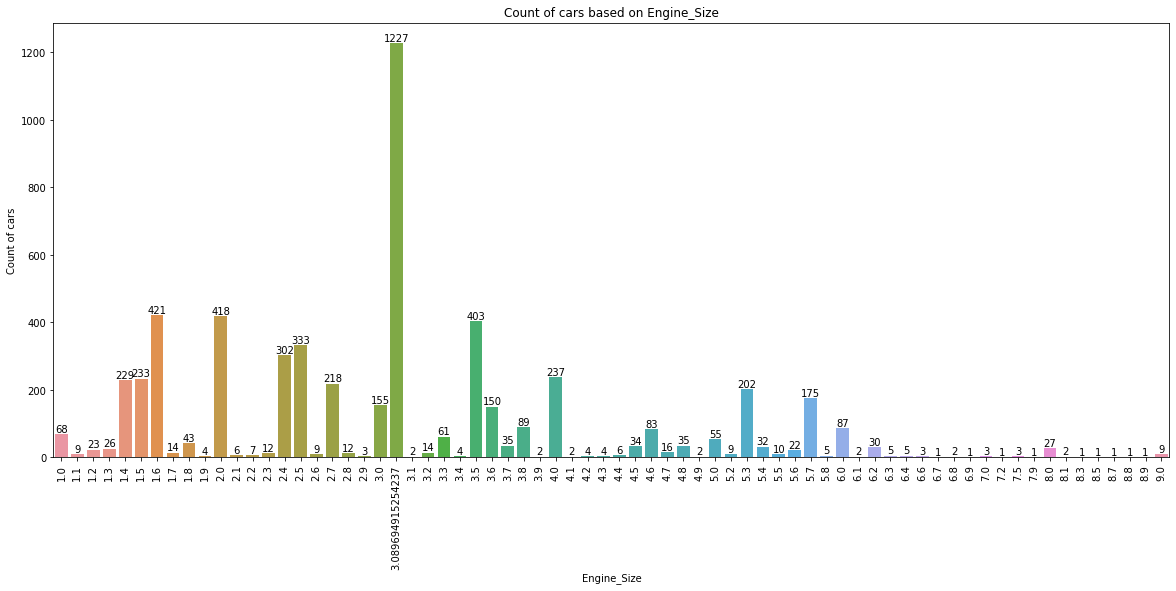

In [38]:
plt.figure(figsize = (20, 8))
plot = sns.countplot(x = 'Engine_Size', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Engine_Size")
plt.xlabel("Engine_Size")
plt.ylabel("Count of cars")

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


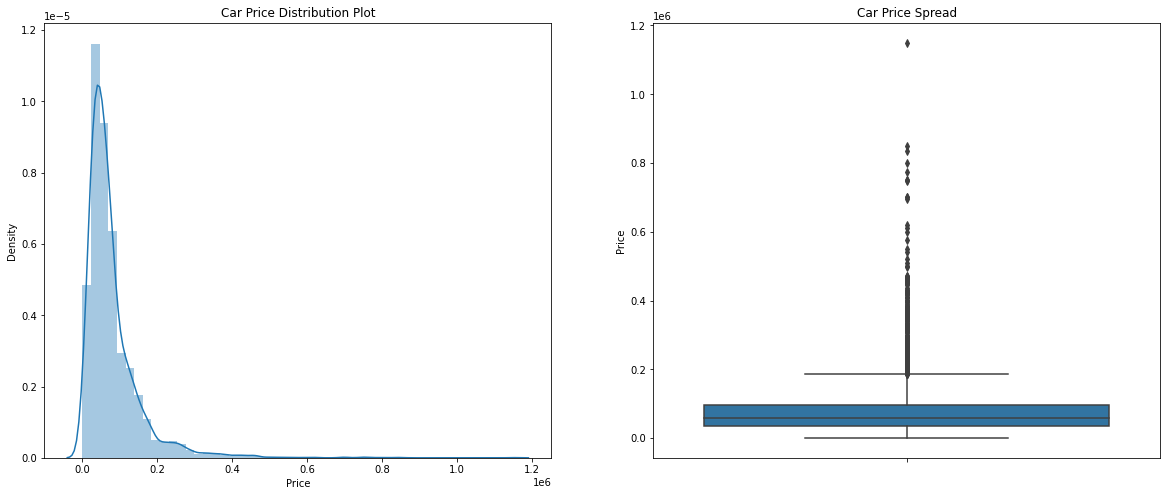

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)

plt.show()

In [40]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.652000e+03
mean     7.853659e+04
std      7.607374e+04
min      0.000000e+00
25%      3.500000e+04
50%      5.800000e+04
75%      9.500000e+04
85%      1.290000e+05
90%      1.550000e+05
100%     1.150000e+06
max      1.150000e+06
Name: Price, dtype: float64


The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)


Text(0, 0.5, 'Count of cars')

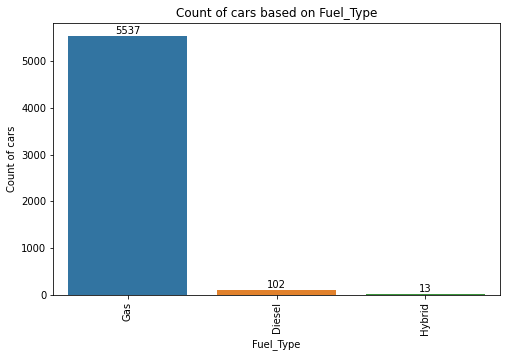

In [41]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Fuel_Type', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count of cars")





Text(0, 0.5, 'Count of Options')

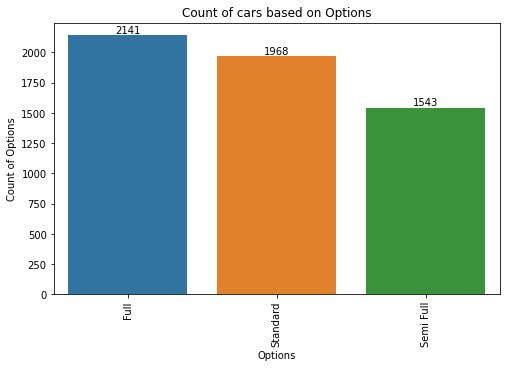

In [42]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Options', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Options")
plt.xlabel("Options")
plt.ylabel("Count of Options")

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


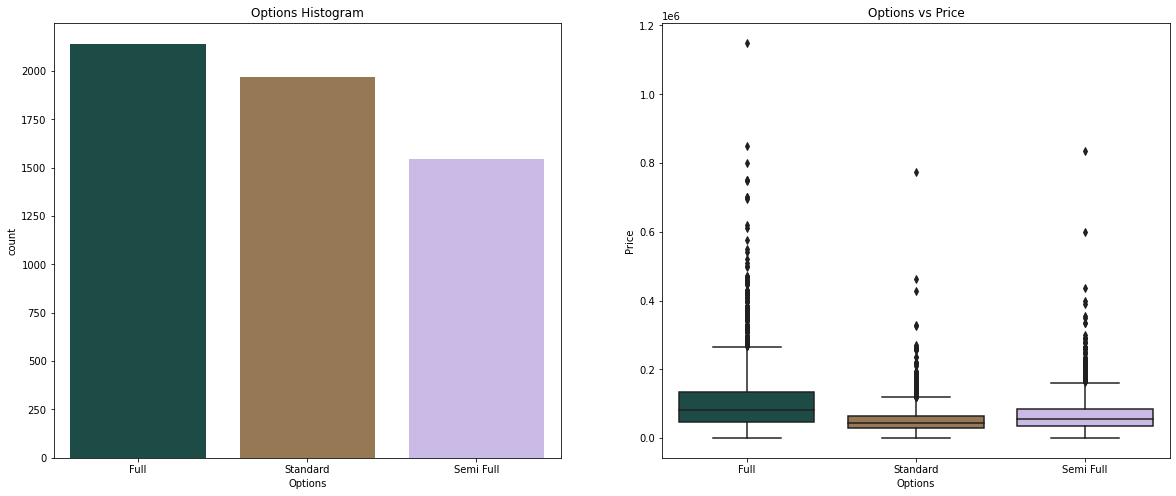

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Options Histogram')
sns.countplot(df.Options, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=df.Options, y=df.Price, palette=("cubehelix"))

plt.show()

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


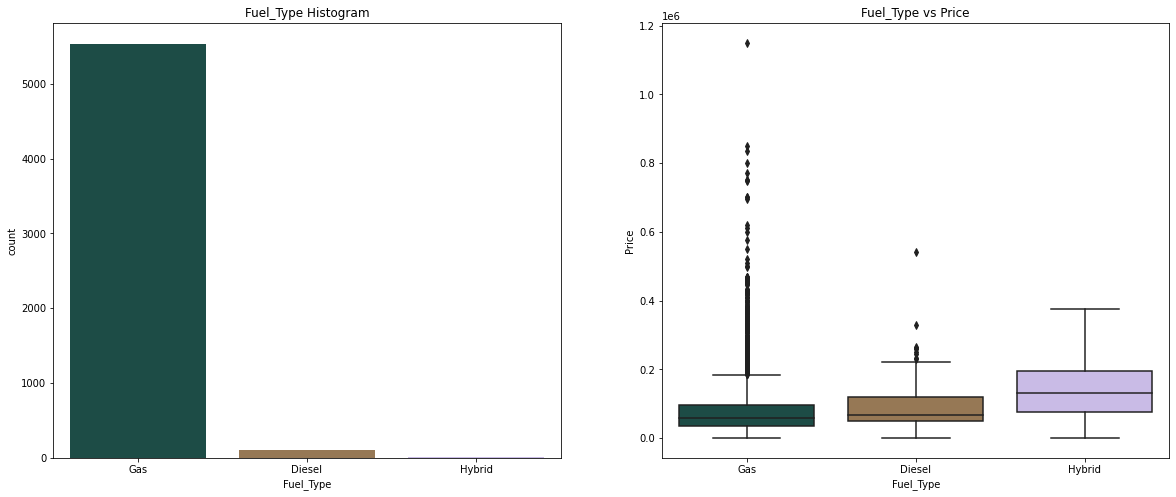

In [44]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel_Type Histogram')
sns.countplot(df.Fuel_Type, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Fuel_Type vs Price')
sns.boxplot(x=df.Fuel_Type, y=df.Price, palette=("cubehelix"))

plt.show()

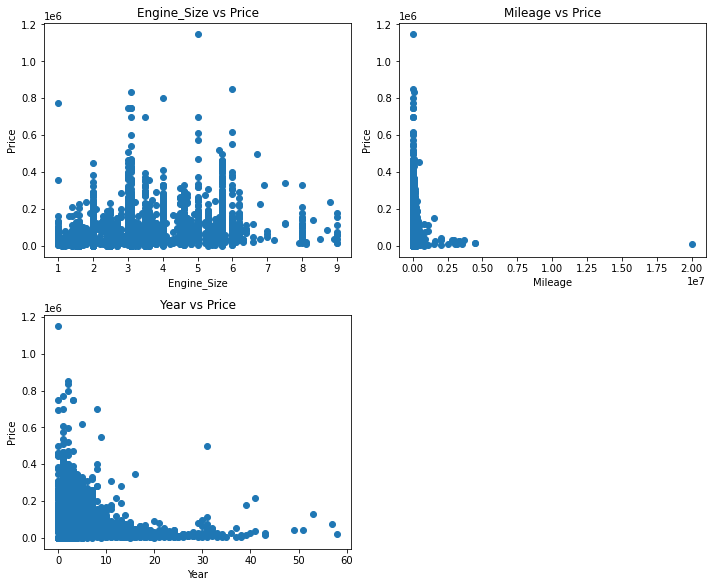

In [45]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Engine_Size', 1)
scatter('Mileage', 2)
scatter('Year', 3)


plt.tight_layout()

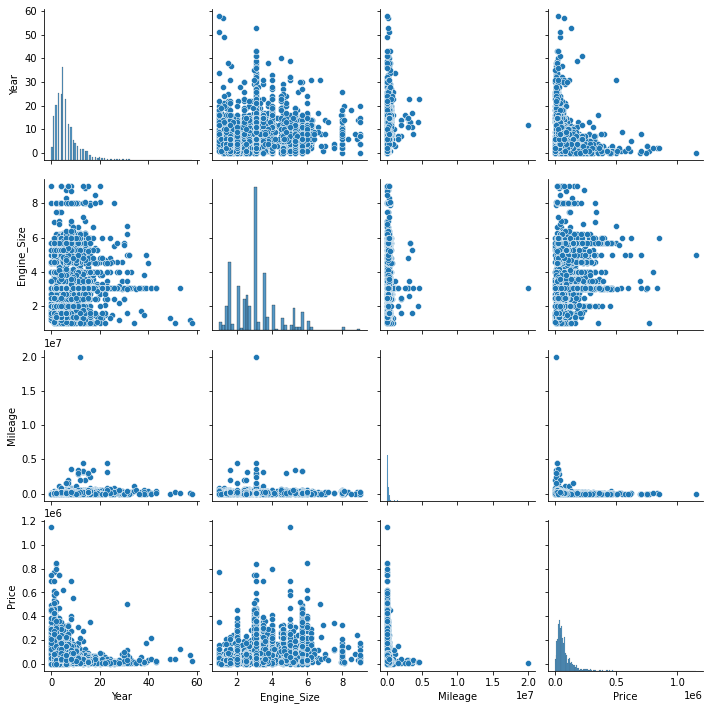

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
df

,Year,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price
0,3,Black,Full,5.700000,Gas,Automatic,103000,114000.0
2,2,Silver,Standard,1.500000,Gas,Automatic,72418,27500.0
3,2,Grey,Standard,1.600000,Gas,Automatic,114154,43000.0
4,2,Silver,Semi Full,2.000000,Gas,Automatic,41912,59500.0
5,3,Navy,Full,1.500000,Gas,Automatic,39000,72000.0
...,...,...,...,...,...,...,...,...
8242,15,Navy,Full,3.500000,Gas,Manual,257000,15000.0
8243,6,Silver,Full,3.089695,Gas,Automatic,77000,75000.0
8244,11,Silver,Full,3.089695,Gas,Automatic,150000,53000.0
8246,10,Silver,Full,2.500000,Gas,Automatic,18500,22000.0


In [48]:
print('skewness value of Price: ',df['Price'].skew())

print('skewness value of Mileage: ',df['Mileage'].skew())
print('skewness value of Engine_Size: ',df['Engine_Size'].skew())

skewness value of Price:  3.69172936104097
skewness value of Mileage:  39.75534771358313
skewness value of Engine_Size:  1.0074233207077927


In [49]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Mileage']=np.where(df['Mileage']>upper_whisker,upper_whisker,np.where(df['Mileage']<lower_whisker,lower_whisker,df['Mileage']))

In [50]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Price']=np.where(df['Price']>upper_whisker,upper_whisker,np.where(df['Price']<lower_whisker,lower_whisker,df['Price']))

In [51]:
print('skewness value of Mileage: ',df['Mileage'].skew())

skewness value of Mileage:  0.8908360853408381


In [52]:
print('skewness value of Price: ',df['Price'].skew())

skewness value of Price:  0.9788669812792231


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Year','Mileage','Engine_Size']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0         Year  2.841255
1      Mileage  2.815823
2  Engine_Size  2.741316


In [54]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df = dummies('Options',df)
df = dummies('Color',df)
df = dummies('Fuel_Type',df)
df = dummies('Gear_Type',df)

df.head()

,Year,Engine_Size,Mileage,Price,Semi Full,Standard,Black,Blue,Bronze,Brown,...,Navy,Oily,Orange,Red,Silver,White,Yellow,Gas,Hybrid,Manual
0,3,5.7,103000.0,114000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.5,72418.0,27500.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2,1.6,114154.0,43000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,2.0,41912.0,59500.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,3,1.5,39000.0,72000.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [55]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Year','Engine_Size','Mileage','Price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [57]:
df_train.head()

,Year,Engine_Size,Mileage,Price,Semi Full,Standard,Black,Blue,Bronze,Brown,...,Navy,Oily,Orange,Red,Silver,White,Yellow,Gas,Hybrid,Manual
7394,0.051724,0.062500,0.365586,0.459459,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6347,0.086207,0.261212,0.339454,0.621622,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2834,0.017241,0.375000,0.053064,0.713514,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6359,0.086207,0.075000,0.193115,0.270270,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1694,0.051724,0.175000,0.220959,0.332432,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


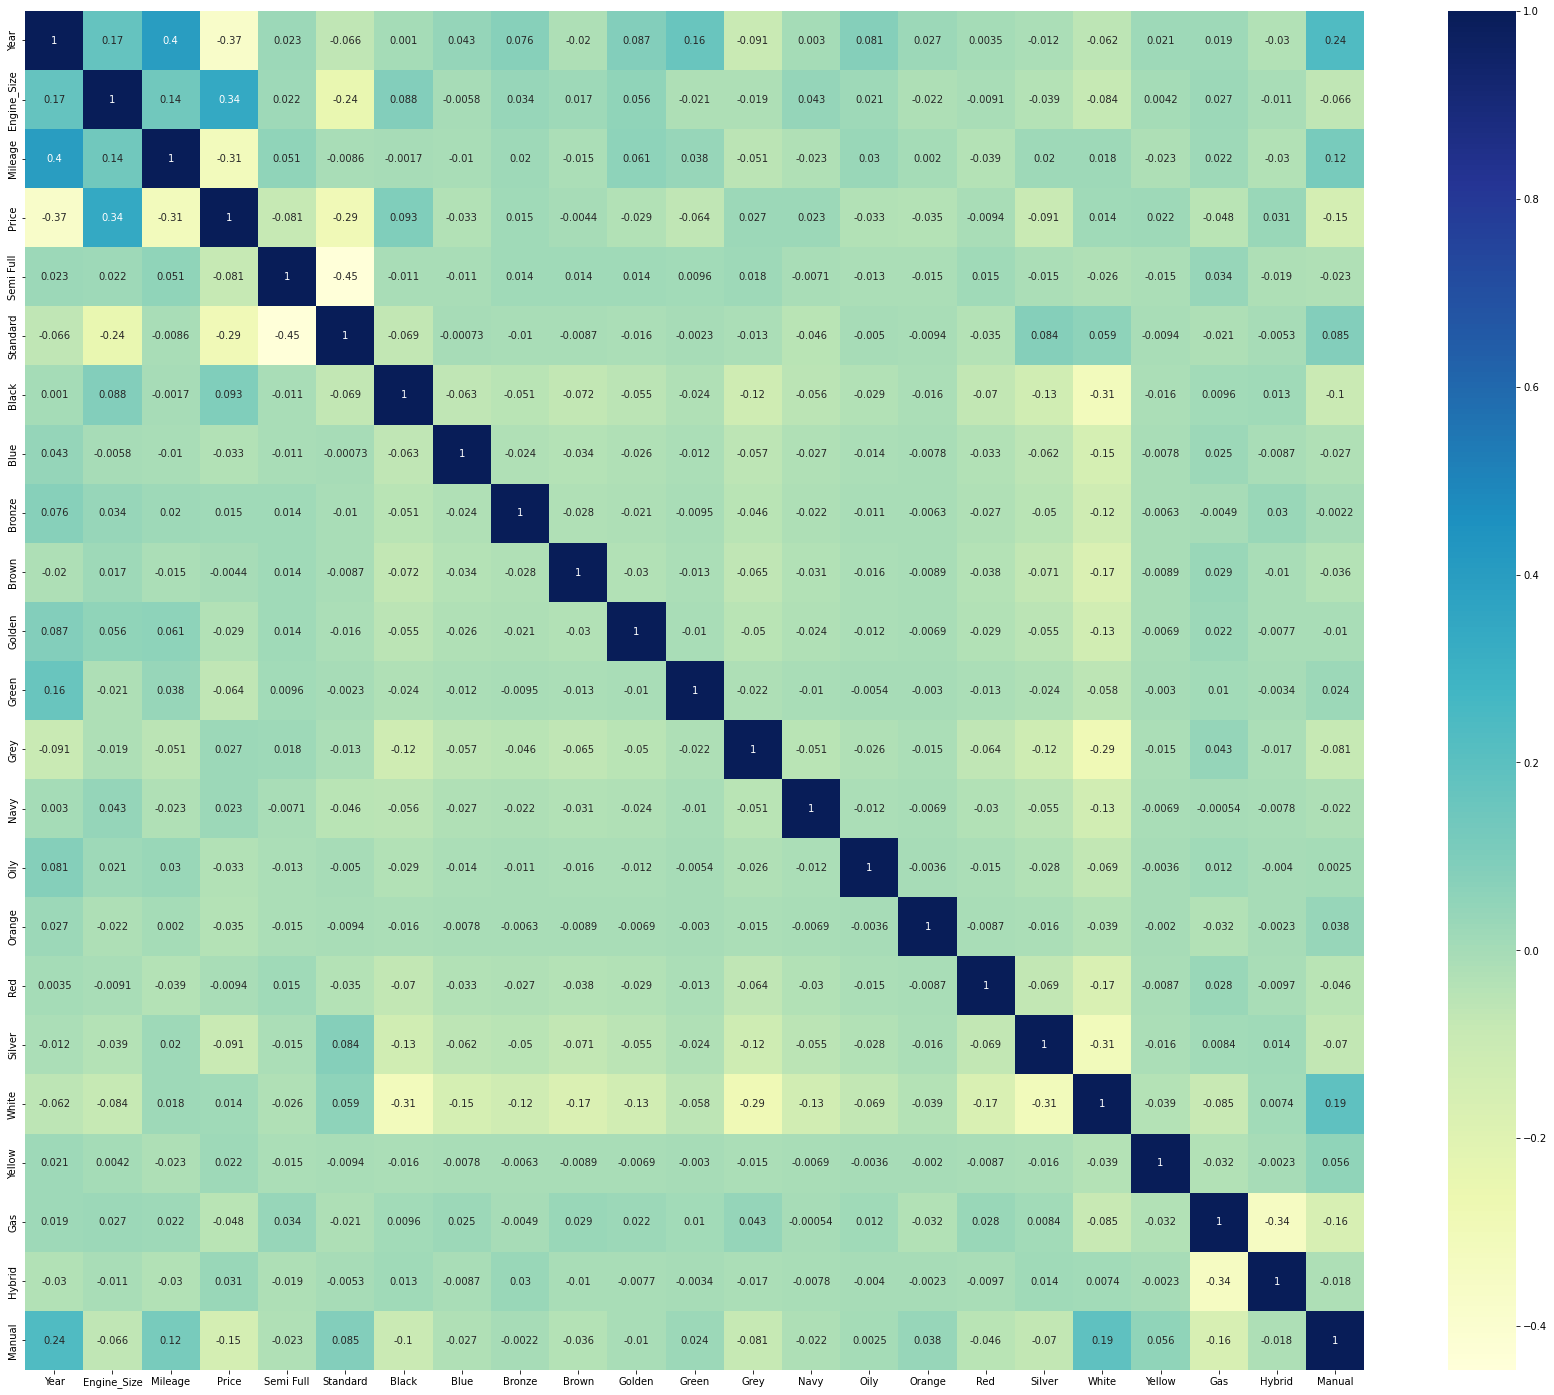

In [58]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Encoding**

In [59]:
y_train = df_train.pop('Price')
X_train = df_train
y_test=df_test.pop('Price')
X_test=df_test

In [60]:
X_train

,Year,Engine_Size,Mileage,Semi Full,Standard,Black,Blue,Bronze,Brown,Golden,...,Navy,Oily,Orange,Red,Silver,White,Yellow,Gas,Hybrid,Manual
7394,0.051724,0.062500,0.365586,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6347,0.086207,0.261212,0.339454,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2834,0.017241,0.375000,0.053064,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6359,0.086207,0.075000,0.193115,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1694,0.051724,0.175000,0.220959,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,0.103448,0.212500,0.203568,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
382,0.017241,0.175000,0.035801,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
88,0.034483,0.062500,0.276055,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5292,0.051724,0.125000,0.221860,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


**Model** **Training**

1. Linear Regression

In [62]:
lin_reg_model = LinearRegression() # loading the linear regression model

In [63]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [64]:
training_data_prediction = lin_reg_model.predict(X_train) # prediction on Training data

In [65]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.4425527641423481
Mean Absolute Error :  0.1492997035951791
Mean squared error :  0.03934383641566182
Root Mean squared error :  0.19835280793490628


Visualize the actual prices and Predicted prices

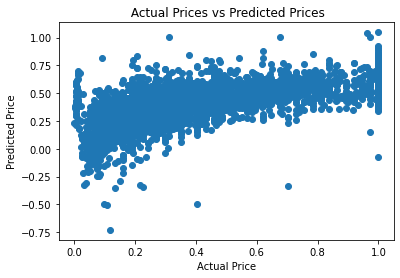

In [66]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [67]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [68]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  -3.769614898479821
Mean Absolute Error :  96325.7202898629
Mean squared error :  11480261698.331398
Root Mean squared error :  107145.9831180404


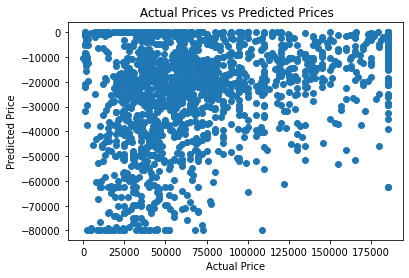

In [69]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [70]:
lass_reg_model = Lasso() # loading the linear regression model

In [71]:
lass_reg_model.fit(X_train,y_train)

Lasso()

**Model** **Evaluation**

In [72]:
training_data_prediction = lass_reg_model.predict(X_train) # prediction on Training data

In [73]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.0
Mean Absolute Error :  0.210738591248742
Mean squared error :  0.0705785837382976
Root Mean squared error :  0.2656663014729147


Visualize the actual prices and Predicted prices

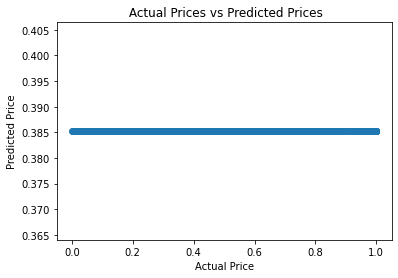

In [74]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [75]:
test_data_prediction = lass_reg_model.predict(X_test) # prediction on Training data

In [76]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  -2.123538659483908
Mean Absolute Error :  71493.1318547312
Mean squared error :  7518225684.668913
Root Mean squared error :  86707.70256827772


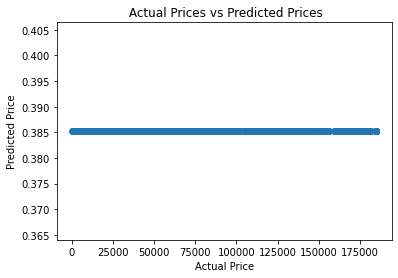

In [77]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [78]:
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  -2.123538659483908
Mean Absolute Error :  71493.1318547312
Mean squared error :  7518225684.668913
Root Mean squared error :  86707.70256827772


In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6) 
X_train = poly.fit_transform(X_train)
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [84]:
print(model.score(X_train,y_train))


0.7347537025792841


In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6) 
X_train = poly.fit_transform(X_train)
model = LinearRegression() 
model.fit(X_train, y_train)


/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: X has 22 features, but LinearRegression is expecting 376740 features as input.

In [ ]:
model.fit(X_train, y_train)

y_test = model.predict(X_test)

In [90]:
X_test

,Year,Engine_Size,Mileage,Semi Full,Standard,Black,Blue,Bronze,Brown,Golden,...,Navy,Oily,Orange,Red,Silver,White,Yellow,Gas,Hybrid,Manual
5065,9,3.500000,160000.00,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3278,4,5.700000,8000.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
189,2,1.000000,22000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6063,0,1.500000,6000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7906,36,3.089695,200.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,5,1.600000,114000.00,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
126,3,2.400000,99000.00,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2447,12,3.500000,373000.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
182,9,1.000000,382773.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Code written by Dhrumil Vadodaria!!

Connect with me on LinkedIn for future discussions on ML: https://www.linkedin.com/in/dhrumil-v-814932128/

Please provide citation if you use the code!